## Setting up the Notebook:

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
import warnings
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/agriculture-and-farming-dataset/agriculture_dataset.csv


## Importing the dataset:

In [2]:
df = pd.read_csv("/kaggle/input/agriculture-and-farming-dataset/agriculture_dataset.csv")

## Exploratory Data Analysis:

In [3]:
# Glimpse of the data
df.head(10)

,Farm_ID,Crop_Type,Farm_Area(acres),Irrigation_Type,Fertilizer_Used(tons),Pesticide_Used(kg),Yield(tons),Soil_Type,Season,Water_Usage(cubic meters)
0,F001,Cotton,329.40,Sprinkler,8.14,2.21,14.44,Loamy,Kharif,76648.20
1,F002,Carrot,18.67,Manual,4.77,4.36,42.91,Peaty,Kharif,68725.54
2,F003,Sugarcane,306.03,Flood,2.91,0.56,33.44,Silty,Kharif,75538.56
3,F004,Tomato,380.21,Rain-fed,3.32,4.35,34.08,Silty,Zaid,45401.23
4,F005,Tomato,135.56,Sprinkler,8.33,4.48,43.28,Clay,Zaid,93718.69
5,F006,Sugarcane,12.50,Sprinkler,6.42,2.25,38.18,Loamy,Zaid,46487.98
6,F007,Soybean,360.06,Drip,1.83,2.37,44.93,Sandy,Rabi,40583.57
7,F008,Rice,464.60,Drip,5.18,0.91,4.23,Silty,Kharif,9392.38
8,F009,Maize,389.37,Drip,0.57,4.93,3.86,Peaty,Rabi,60202.14
9,F010,Soybean,184.37,Drip,2.18,2.67,17.25,Sandy,Kharif,90922.15


In [4]:
# Showing the columns
df.columns

Index(['Farm_ID', 'Crop_Type', 'Farm_Area(acres)', 'Irrigation_Type',
       'Fertilizer_Used(tons)', 'Pesticide_Used(kg)', 'Yield(tons)',
       'Soil_Type', 'Season', 'Water_Usage(cubic meters)'],
      dtype='object')

In [5]:
df.shape

(50, 10)

In [6]:
df[['Crop_Type', 'Irrigation_Type']]

,Crop_Type,Irrigation_Type
0,Cotton,Sprinkler
1,Carrot,Manual
2,Sugarcane,Flood
3,Tomato,Rain-fed
4,Tomato,Sprinkler
5,Sugarcane,Sprinkler
6,Soybean,Drip
7,Rice,Drip
8,Maize,Drip
9,Soybean,Drip


In [7]:
df.describe()

,Farm_Area(acres),Fertilizer_Used(tons),Pesticide_Used(kg),Yield(tons),Water_Usage(cubic meters)
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,254.963800,4.905400,2.398000,27.059200,56724.295600
std,139.417782,2.732689,1.438613,13.345789,27264.992053
min,12.500000,0.500000,0.140000,3.860000,5869.750000
25%,135.710000,2.437500,0.972500,16.190000,37818.152500
50%,281.980000,5.045000,2.330000,28.970000,54097.075000
75%,368.107500,6.885000,3.417500,37.860000,82240.032500
max,483.880000,9.960000,4.990000,48.020000,94754.730000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


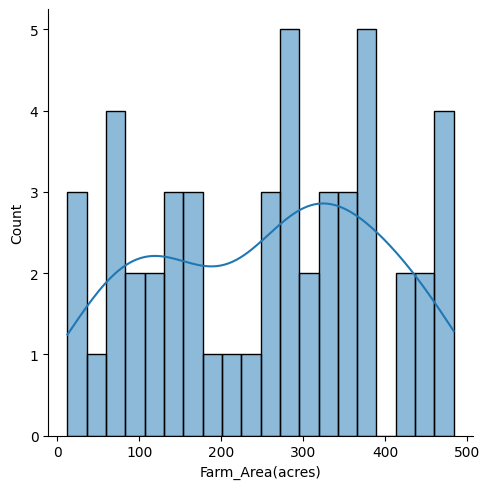

In [8]:
sns.displot(df['Farm_Area(acres)'], bins=20, kde=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Fertilizer_Used(tons)', ylabel='Count'>

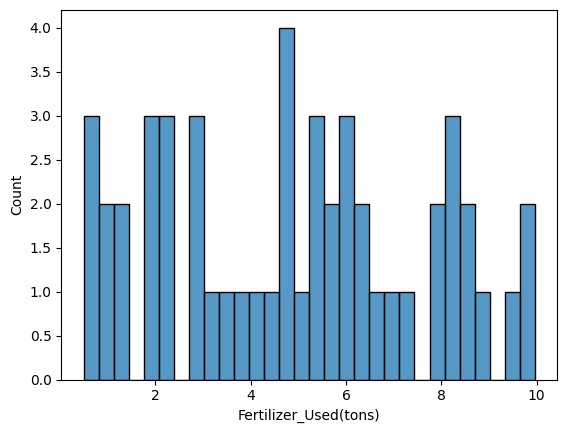

In [9]:
sns.histplot(df['Fertilizer_Used(tons)'], bins=30)

The histogram shows the distribution of fertilizer usage in tons across different data points. Fertilizer usage appears relatively evenly distributed from 0 to 10 tons, with a slight concentration around the 4-ton mark, suggesting this level is somewhat common among the observations. No extreme peaks or outliers are present, indicating that fertilizer usage is relatively consistent and dispersed across the dataset. This could imply balanced fertilizer application practices without significant variance in usage across different observations.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


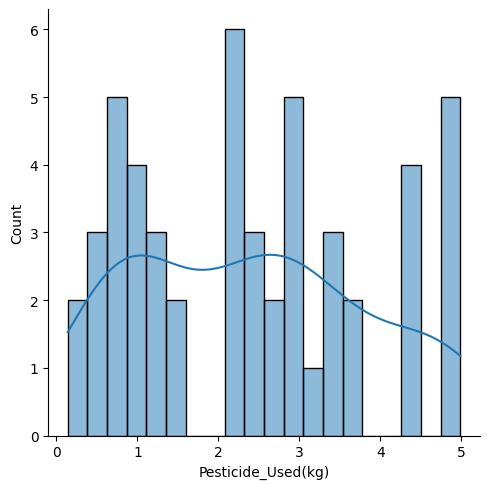

In [10]:
sns.displot(df['Pesticide_Used(kg)'], bins=20, kde=True)

Overall, this plot suggests that while pesticide usage varies, certain levels (particularly around 1 kg and 4–5 kg) are more frequently observed, indicating possible standard usage levels or clusters within the data.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Water_Usage(cubic meters)', ylabel='Count'>

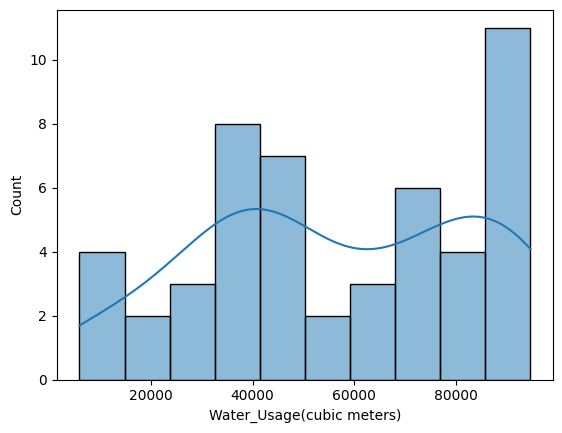

In [11]:
sns.histplot(df['Water_Usage(cubic meters)'], bins=10, kde=True)

Overall, the data points to two common levels of water usage—around 40,000 and 80,000 cubic meters—while lower and mid-level usages are less frequent. This could imply diverse water usage needs among the agricultural activities represented.

In [12]:
df_numeric = df.select_dtypes(include=['number'])

# Correlation matrix
corrmat = df_numeric.corr()

<Axes: >

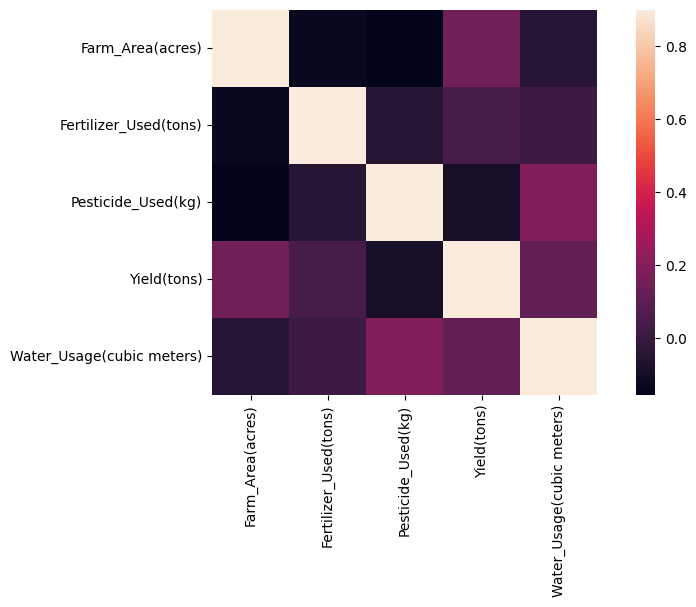

In [13]:
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(corrmat, vmax= .9, square = True)

## Conclusion:

The most notable correlations are:

	•	Farm Area with Yield and Water Usage, suggesting that larger farms yield more and use more water.
	•	Yield has a positive relationship with both Farm Area and Fertilizer Usage, indicating that both factors can contribute to higher yields.